# Ridgeline plot

## Preparation


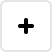
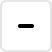
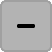
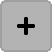
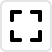
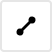
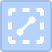
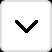
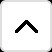
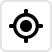

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm

from lets_plot import *
from lets_plot.mapping import as_discrete
LetsPlot.setup_html()

In [2]:
def plot_matrix(plots=[], width=400, height=300, columns=2):
    bunch = GGBunch()
    for i in range(len(plots)):
        row = int(i / columns)
        column = i % columns
        bunch.add_plot(plots[i], column * width, row * height, width, height)
    return bunch.show()

In [3]:
iris_df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/iris.csv")
print(iris_df.shape)
iris_df.head()

(150, 5)


sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [4]:
mpg_df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
print(mpg_df.shape)
mpg_df.head()

(234, 12)


Unnamed: 0 manufacturer model  displ  year  cyl       trans drv  cty  hwy  \
0           1         audi    a4    1.8  1999    4    auto(l5)   f   18   29   
1           2         audi    a4    1.8  1999    4  manual(m5)   f   21   29   
2           3         audi    a4    2.0  2008    4  manual(m6)   f   20   31   
3           4         audi    a4    2.0  2008    4    auto(av)   f   21   30   
4           5         audi    a4    2.8  1999    6    auto(l5)   f   16   26   

  fl    class  
0  p  compact  
1  p  compact  
2  p  compact  
3  p  compact  
4  p  compact

In [5]:
identity_df = pd.DataFrame({
    "x": [1, 2, 3, 4, 5],
    "y": [0, 0, 0, 0, 0],
    "h": [-.2, .4, -.3, .5, -.1],
})
print(identity_df.shape)
identity_df.head()

(5, 3)


x  y    h
0  1  0 -0.2
1  2  0  0.4
2  3  0 -0.3
3  4  0  0.5
4  5  0 -0.1

In [6]:
big_n = 10_000
big_df = pd.DataFrame({"x": np.linspace(-3, 3, big_n)}).assign(
    h=lambda r: norm.pdf(r.x),
    y=lambda r: 0,
)
print(big_df.shape)
big_df.head()

(10000, 3)


x         h  y
0 -3.0000  0.004432  0
1 -2.9994  0.004440  0
2 -2.9988  0.004448  0
3 -2.9982  0.004456  0
4 -2.9976  0.004464  0

## Demonstration

### Default plot

In [7]:
ggplot(iris_df) + \
    geom_area_ridges(aes("sepal_length", "species"))

### One ridge

In [8]:
ggplot(iris_df[iris_df.species == "setosa"]) + \
    geom_area_ridges(aes("sepal_length", "species"))

### Negative `height` and `'identity'` stat

In [9]:
ggplot(identity_df) + \
    geom_area_ridges(aes("x", "y", height="h"), stat='identity', color="black", fill="#3182bd", min_height=-.2)

### Parameters

In [10]:
# With `scale` specified
ggplot(iris_df) + \
    geom_area_ridges(aes("sepal_length", "species"), scale=1.5)

In [11]:
# With `quantiles` specified
qn = 7
quantiles = [i / qn for i in range(1, qn)]

width, height = 400, 300
bunch = GGBunch()
bunch.add_plot(ggplot(iris_df) + \
    geom_area_ridges(aes("sepal_length", "species"), quantiles=quantiles, \
                     color='black'),
    0, 0, width, height)
bunch.add_plot(ggplot(iris_df) + \
    geom_area_ridges(aes("sepal_length", "species"), quantiles=quantiles, \
                     quantile_lines=True, color='black'),
    width, 0, width, height)
bunch.add_plot(ggplot(iris_df) + \
    geom_area_ridges(aes("sepal_length", "species", fill="..quantile.."), \
                     quantiles=quantiles, color='black'),
    0, height, width, height)
bunch.add_plot(ggplot(iris_df) + \
    geom_area_ridges(aes("sepal_length", "species", fill="..quantile.."), \
                     quantiles=quantiles, quantile_lines=True, color='black'),
    width, height, width, height)
bunch.show()

In [12]:
ggplot(iris_df) + \
    geom_area_ridges(aes("sepal_length", "species"), kernel="triangular", adjust=.8, \
                     quantile_lines=True, trim=True, color="#993404", fill="#fe9929")

### Tooltips

In [13]:
ggplot(iris_df) + \
    geom_area_ridges(aes("sepal_length", "species"), \
                     tooltips=layer_tooltips().title("@species")\
                                              .line("height|@..height..")\
                                              .format("@..density..", ".3f")\
                                              .line("density|@..density..")\
                                              .line("quantile|@..quantile.."), \
                     quantile_lines=True)

### Flip coordinates

In [14]:
ggplot(iris_df) + \
    geom_area_ridges(aes("sepal_length", "species")) + \
    coord_flip()

### Grouping

In [15]:
ggplot(mpg_df) + \
    geom_area_ridges(aes("hwy", as_discrete("year"), fill="drv"), scale=1.2, color="black", alpha=.5)

### Facetting

In [16]:
ggplot(mpg_df) + \
    geom_area_ridges(aes("hwy", as_discrete("year"), fill="drv"), scale=1.2, color="black", alpha=.5) + \
    facet_grid(x="drv")

## Regression tests

### Small or empty datasets

In [17]:
tests = [
    {
        'data': {
            'x': [0],
            'y': [0],
        },
        'stat': 'densityridges',
        'title': "One element in data",
    },
    {
        'data': {
            'x': [0, 1],
            'y': [0, 0],
        },
        'stat': 'densityridges',
        'title': "Two x's in data",
    },
    {
        'data': {
            'x': [0, 0],
            'y': [0, 1],
        },
        'stat': 'densityridges',
        'title': "Two y's in data",
    },
    {
        'data': {
            'x': [np.nan, 0, 0],
            'y': [0, np.nan, 0],
        },
        'stat': 'densityridges',
        'title': "NaN's in data",
    },
    {
        'data': {
            'x': [],
            'y': [],
            'h': [],
        },
        'stat': 'identity',
        'title': "Empty data (stat='identity')",
    },
    {
        'data': {
            'x': [0],
            'y': [0],
            'h': [1],
        },
        'stat': 'identity',
        'title': "One element in data (stat='identity')",
    },
    {
        'data': {
            'x': [0, 0],
            'y': [0, 1],
            'h': [1, 1],
        },
        'stat': 'identity',
        'title': "Two y's in data (stat='identity')",
    },
    {
        'data': {
            'x': [0, 1],
            'y': [0, 0],
            'h': [1, 1],
        },
        'stat': 'identity',
        'title': "Two x's in data (stat='identity')",
    },
    {
        'data': {
            'x': [np.nan, 0, 0, 0, 1],
            'y': [0, np.nan, 0, 0, 0],
            'h': [1, 1, np.nan, 1, 1],
        },
        'stat': 'identity',
        'title': "Nan's in data (stat='identity')",
    },
]

plot_matrix([
    ggplot(test['data']) + \
        geom_area_ridges(aes('x', 'y', height='h') if test['stat'] == 'identity' else aes('x', 'y'), \
                         stat=test['stat']) + \
        ggtitle(test['title'])
    for test in tests
])

### Too big dataset

In [18]:
ggplot(big_df) + \
    geom_area_ridges(aes("x", "y", height="h"), stat='identity')